In [157]:
import numpy as np
from scipy import io

In [158]:
data1 = io.loadmat('ex5data1.mat')
X = data1['X']
y = data1['y']
Xtest = data1['Xtest']
ytest = data1['ytest']
Xval = data1['Xval']
yval = data1['yval']
print(X.shape, y.shape)

(12, 1) (12, 1)


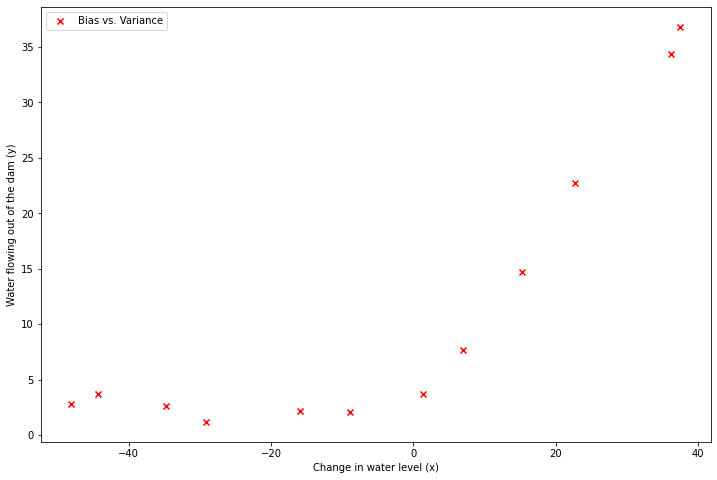

In [159]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(12,8))
ax.scatter(X, y, c='r', marker='x', label='Bias vs. Variance')
ax.legend(loc='best')
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
plt.show()

In [160]:
def linearRegCostFunction(theta, X, y, r=1):
    X_tmp = np.insert(X, 0, 1, axis=1)
    theta = np.matrix(theta)
    term = np.dot(X_tmp, theta.T) - y
    loss = np.sum(np.multiply(term, term))
    penalty = np.sum(np.multiply(theta[:,1:],theta[:,1:])) * r
    ret = (loss + penalty) / (len(X_tmp) * 2)
    return ret

In [161]:
theta = np.ones((1, X.shape[1]+1))
linearRegCostFunction(theta, X, y)

303.9931922202643

In [162]:
def gradient(theta, X, y, r=1):
    X_tmp = np.insert(X, 0, 1, axis=1)
    theta = theta.reshape(1, X_tmp.shape[1])
    error = np.dot(X_tmp, theta.T) - y
    loss = np.dot(error.T, X_tmp)
    tmp_theta = np.zeros_like(theta)
    tmp_theta[:, 1:] = theta[:, 1:]
    penalty = r * tmp_theta
    return np.array((loss + penalty)) / len(y)

In [163]:
gradient(theta, X, y)
gradient(theta, X, y)
gradient(theta, X, y)

array([[-15.30301567, 598.25074417]])

In [164]:
X.shape, y.shape, type(theta), theta.shape, np.matrix(theta).shape

((12, 1), (12, 1), numpy.ndarray, (1, 2), (1, 2))

In [165]:
from scipy import optimize
r = 1
result = optimize.minimize(fun=linearRegCostFunction,x0=theta,args=(X, y, r),method='TNC', jac=gradient, options={'disp': True})

In [166]:
result

     fun: 22.379541822940322
     jac: array([[ 3.27512342e-07, -1.70992000e-08]])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 9
     nit: 4
  status: 1
 success: True
       x: array([13.0877145,  0.367742 ])

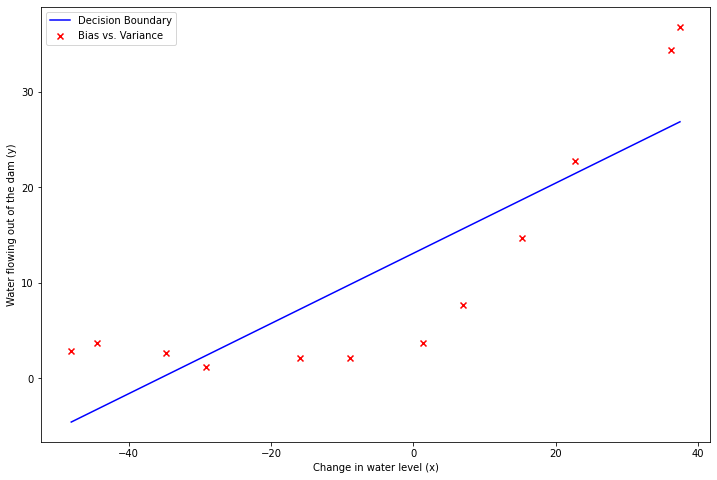

In [167]:
_, ax = plt.subplots(figsize=(12,8))
test_x = np.linspace(X.min(), X.max(), 100)
test_y = result.x[0] + test_x*result.x[1]
ax.plot(test_x, test_y, c='b', label='Decision Boundary')
ax.scatter(X, y, c='r', marker='x', label='Bias vs. Variance')
ax.legend(loc='best')
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
plt.show()